# Parameters To Test:
## Microwave Parameters:
* Microwave Power
* Microwave pulse start time
* Microwave frequency
## Laser Parameters:
* AOM Intensity 
* Pump \ Image length? 

In [ ]:
"hiiiiiiii"

In [1]:
import os


os.chdir(r"D:\NanoDiamond\PulseSequencer")

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from IPython.display import display

from Interfaces.dataSaver import dataSaver

from Data.pulseConfiguration import pulseConfiguration
from Data.microwaveConfiguration import microwaveConfiguration
from Data.measurementType import measurementType

from LogicManagers.measurementManager import measurementManager
from LogicManagers.scanManager import scanManager
from LogicManagers import pulseAnalayzer

from time import sleep

In [14]:
def plotPulsesData(data):       
    xLabel = data.columns[0]
    yLabel = data.columns[1]

    t_image, y_image = pulseAnalayzer.getOnlyImage(data[xLabel], data[yLabel])
    t_pump, y_pump = pulseAnalayzer.getOnlyPump(data[xLabel], data[yLabel])
    
    # pump_intensity[AOM_intensity] = pulseAnalayzer.getIntegraionOfPump(data[xLabel], data[yLabel])
    # image_intensity[AOM_intensity] = pulseAnalayzer.getIntegraionOfImage(data[xLabel], data[yLabel])

    plt.plot(t_pump, y_pump, label = "Pump")
    plt.plot(t_image, y_image, label = "Image")
    
    plt.legend()

    plt.xlabel(xLabel)
    plt.ylabel(yLabel)

    plt.show()

In [5]:
Iterations = 1000000

pulseConfig = pulseConfiguration()

pulseConfig.count_duration = 1
pulseConfig.samples_number = 1024
pulseConfig.threshold = 1.6
pulseConfig.iterations = Iterations
pulseConfig.pump_start = 0
pulseConfig.pump_duration = 4
pulseConfig.microwave_start = 5
pulseConfig.microwave_duration = 1
pulseConfig.image_start = 8
pulseConfig.image_duration = 4
pulseConfig.readout_start = 0
pulseConfig.low_voltage_AOM = 0
pulseConfig.high_voltage_AOM = 0.9
pulseConfig.measurement_type = measurementType.RabiPulse

microwaveConfig = microwaveConfiguration(
    trigMode = 0,
    centerFreq=2896,
    power=0)

In [6]:
measurement_manager = measurementManager()
measurement_manager.connectToEverything()

scan_manager = scanManager(measurement_manager)

In [9]:
measurements = []

AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2896 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
0.0 183544.92000000007
AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2896 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
0.05 182748.4362704936
AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2896 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
0.1 183026.54053244338
AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent:

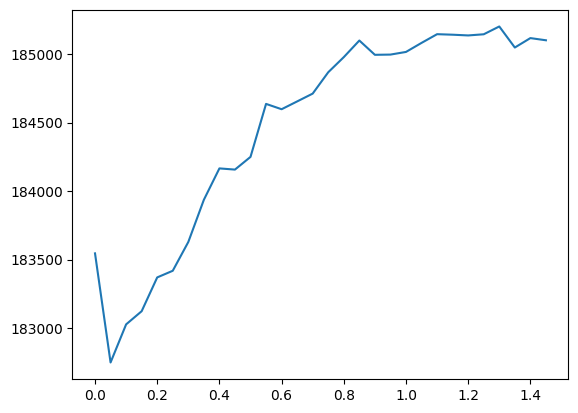

In [7]:
for d,t in scan_manager.startScan(pulseConfig, microwaveConfig, 0, 1.5, 0.05):
    print(t, d)

plt.plot(scan_manager.extractedData.keys(), scan_manager.extractedData.values())
plt.show()

In [24]:
data_saver = dataSaver(scan_manager.measurementManager, scan_manager)

In [25]:
data_saver.saveCompleteScan("hiii", "rabi_scan_test")

TypeError: cannot unpack non-iterable numpy.float64 object

In [10]:
measurements.append(scan_manager.extractedData)

In [17]:
import pandas as pd

In [21]:
def extractPointFromPulseSequence_Hezi(pulseSequence : pd.DataFrame):
    time_image, data_image = pulseAnalayzer.getOnlyImage(pulseSequence[pulseSequence.columns[0]], pulseSequence[pulseSequence.columns[1]])
    time_label = "Time"
    data_label = "Data"
    start_time_image = time_image[0]
    end_time_image = time_image[-1]
    
    image_df = pd.DataFrame({time_label : time_image, data_label : data_image})
    peak = image_df[(image_df[time_label] > start_time_image) & (image_df[time_label] < (start_time_image + 0.3))]
    reference = image_df[(image_df[time_label] > (end_time_image - 0.3)) & (image_df[time_label] < end_time_image)]

    peak_integration = np.sum(peak[data_label])
    reference_integration = np.sum(reference[data_label])

    result = (peak_integration - reference_integration)/(peak_integration + reference_integration)

    return result

In [22]:
hezi_extract = {}

for time in scan_manager.measurementData:
    print(time)
    data = scan_manager.measurementData[time]
    point_hezi = extractPointFromPulseSequence_Hezi(data)
    hezi_extract[time] = point_hezi

0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001
1.0
1.05
1.1
1.1500000000000001
1.2000000000000002
1.25
1.3
1.35
1.4000000000000001
1.4500000000000002


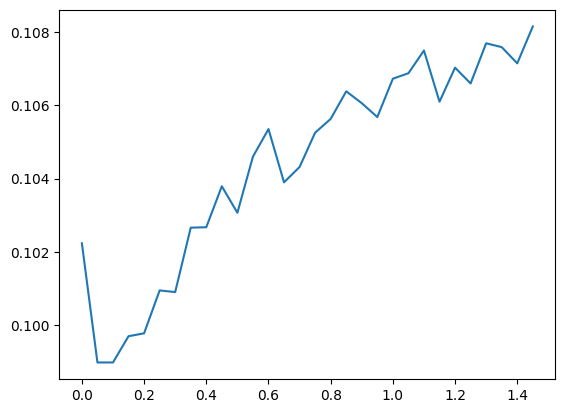

In [23]:
plt.plot(hezi_extract.keys(), hezi_extract.values())